# <font color='orange'>1. Import Libraries</font>

In [1]:
import re
import nltk
import string
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding, Input, GRU, TimeDistributed
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px
import cufflinks as cf
cf.go_offline()

# <font color='orange'>2. Read Data</font>

In [ ]:
Art_df = pd.read_csv('/content/drive/MyDrive/dataset(Task)/Art.csv')
Economy_df = pd.read_csv('/content/drive/MyDrive/dataset(Task)/Economy.csv')
Sports_df = pd.read_csv('/content/drive/MyDrive/dataset(Task)/Sports.csv')

In [ ]:
dataset = pd.concat([Art_df, Economy_df, Sports_df])
dataset.head()

,Unnamed: 0,Article Title,Category
0,0,\n\nWorks by Picasso and others stolen in Spai...,Art
1,1,\n\nSalwa and Maged at the Art Corner Gallery ...,Art
2,2,\n\nA tribute to Abdalla Gohar\n\n\n\nOn 1 Dec...,Art
3,3,"\n\nRaw, untamed, and compelling: ‘Flesh’ by S...",Art
4,4,\n\nFrom water to mosaics\n\n\n\nThe Gezira Ce...,Art


In [ ]:
dataset.to_csv('/content/drive/MyDrive/dataset(Task)/dataset.csv')

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset(Task)/dataset.csv', usecols=['Article Title', 'Category'])
dataset.head()

,Article Title,Category
0,\n\nWorks by Picasso and others stolen in Spai...,Art
1,\n\nSalwa and Maged at the Art Corner Gallery ...,Art
2,\n\nA tribute to Abdalla Gohar\n\n\n\nOn 1 Dec...,Art
3,"\n\nRaw, untamed, and compelling: ‘Flesh’ by S...",Art
4,\n\nFrom water to mosaics\n\n\n\nThe Gezira Ce...,Art


Show distribution of Categories in the dataset

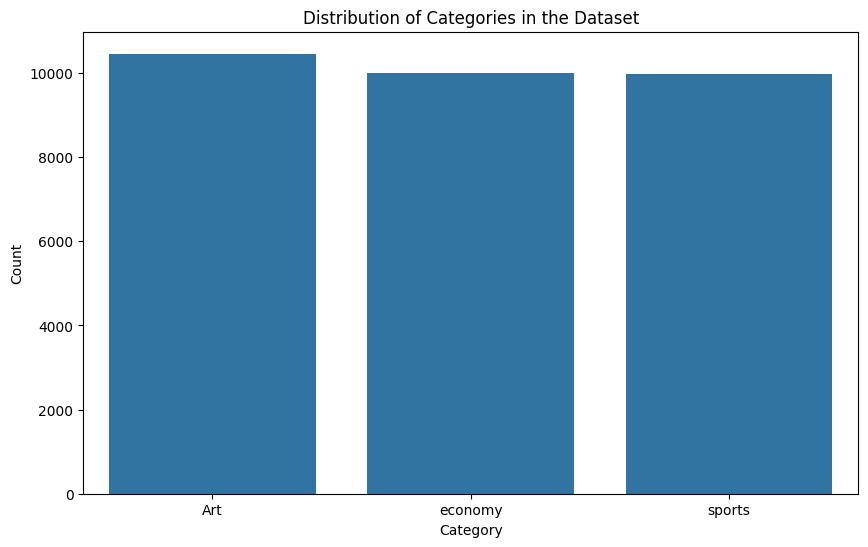

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Category', order=dataset['Category'].value_counts().index)
plt.xticks()
plt.title('Distribution of Categories in the Dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

As shown data is balanced



---



Calculate the length of each article title

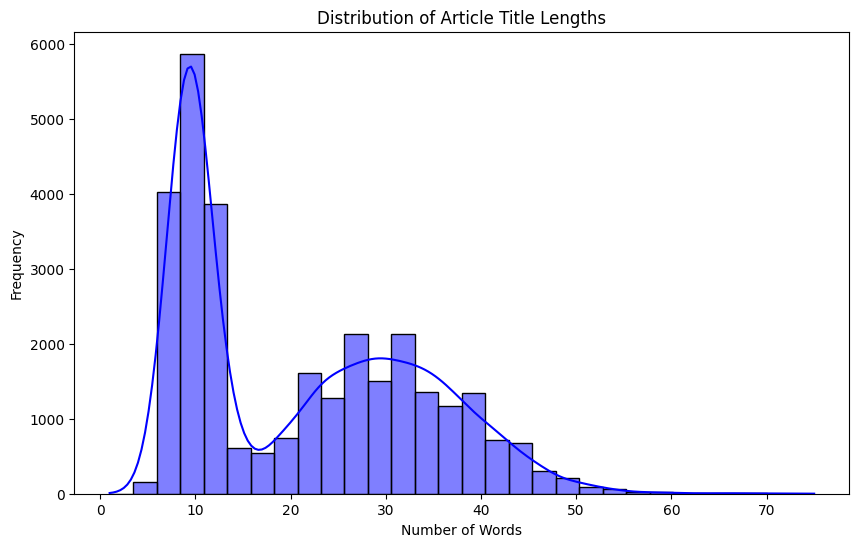

In [4]:
dataset['Title Length'] = dataset['Article Title'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(dataset['Title Length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Article Title Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


Generate a word cloud for the most common words in article titles

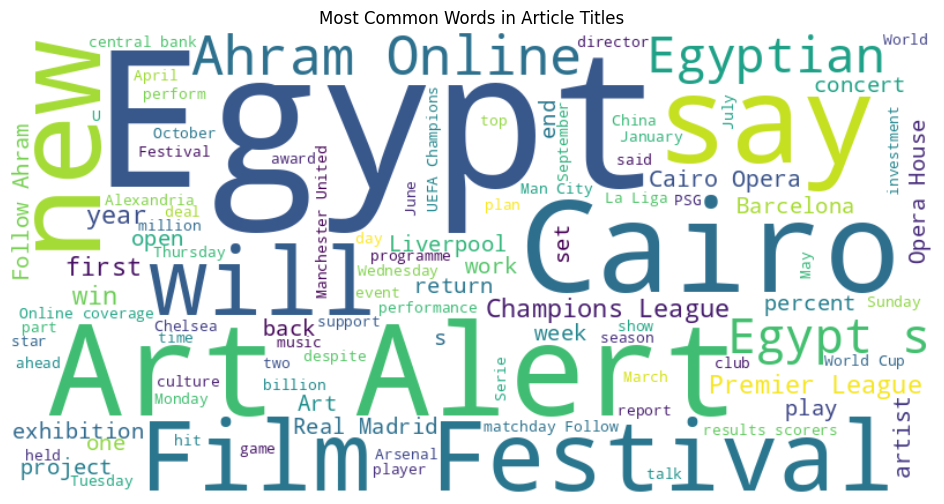

In [5]:
all_titles = ' '.join(dataset['Article Title'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_titles)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Article Titles')
plt.show()

<font size='4'>This dataset for Article it has Article Title and Category
> Now, we can show Article Title with Category `Art`.
</font>

In [6]:
dataset[dataset['Category'] == 'Art']

,Article Title,Category,Title Length
0,\n\nWorks by Picasso and others stolen in Spai...,Art,13
1,\n\nSalwa and Maged at the Art Corner Gallery ...,Art,34
2,\n\nA tribute to Abdalla Gohar\n\n\n\nOn 1 Dec...,Art,20
3,"\n\nRaw, untamed, and compelling: ‘Flesh’ by S...",Art,30
4,\n\nFrom water to mosaics\n\n\n\nThe Gezira Ce...,Art,32
...,...,...,...
10452,Netflix’s first Arabic film production remains...,Art,51
10453,Disney+ to launch in Egypt this summer\n\n\n\n...,Art,31
10454,China gives 'Fight Club' new ending where auth...,Art,36
10455,Egypt’s Actors’ Syndicate defends Mona Zaki as...,Art,59


<font size='4'>

> Now, we can show Article Title with Category `Economy`.
</font>

In [7]:
dataset[dataset['Category'] == 'economy']

,Article Title,Category,Title Length
10457,"\n\nChinese demand, Mideast turmoil boost ship...",economy,27
10458,\n\nEgypt government to issue LE1 bn in zero c...,economy,30
10459,\n\nFirst Egyptian Samsung factory starts prod...,economy,19
10460,\n\nUPDATED: Egyptian and Arab stocks soar as ...,economy,32
10461,\n\nGreek high school teachers to strike over ...,economy,34
...,...,...,...
20452,Egypt imposes three-month export ban on cookin...,economy,48
20453,"Egypt bans export of wheat, other staples for ...",economy,42
20454,"Egypt’s annual inflation hit 10% in February, ...",economy,40
20455,INTERVIEW: EBRD supports Egypt’s green transfo...,economy,48


<font size='4'>

> Now, we can show Article Title with Category `Sports`.
</font>

In [8]:
dataset[dataset['Category'] == 'sports']

,Article Title,Category,Title Length
20457,\n\nFans in shock after Leicester City helicop...,sports,8
20458,\n\nLeicester City football club owner was on ...,sports,11
20459,\n\nLeicester City football club owner's helic...,sports,9
20460,\n\nRonaldo scores twice as Juve overcome frig...,sports,11
20461,\n\nKlopp hails Liverpool's '20-point win' ove...,sports,7
...,...,...,...
30432,Germany Bundesliga results & scorers (21st mat...,sports,21
30433,Barcelona go fourth after winning six-goal thr...,sports,47
30434,Dortmund humiliated by Leverkusen in Haaland's...,sports,42
30435,"Back from injury, 1st Liverpool goal for teen ...",sports,38


In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
def clean_text(text_field):
  if isinstance(text_field, str):  # Check if the text is a string
    text_without_url = re.sub(r"http\S+|www\S+|https\S+", "", text_field, flags=re.MULTILINE) # Remove URL
    text_without_special = re.sub(r"@[A-Za-z0-9]+", ' ', text_without_url) # Remove special charaters
    text_lower = text_without_special.lower() # convert to lower case
    tokens = nltk.word_tokenize(text_lower)
    stop_words = set(stopwords.words('english')) # Convert to a set for efficient lookup
    text_filtered = [token for token in tokens if token not in stop_words]
    text_lemmatize = [WordNetLemmatizer().lemmatize(token) for token in text_filtered] # Lemmatize each token individually
    cleaned_text = ' '.join(text_lemmatize) # Join the tokens back into a string
    return cleaned_text
  else:
    return '' # Return an empty string for non-string inputs to avoid introducing lists

In [11]:
dataset['cleaned_Article_Title'] = dataset['Article Title'].apply(clean_text)
dataset.head(10)

,Article Title,Category,Title Length,cleaned_Article_Title
0,\n\nWorks by Picasso and others stolen in Spai...,Art,13,work picasso others stolen spain picasso art s...
1,\n\nSalwa and Maged at the Art Corner Gallery ...,Art,34,salwa maged art corner gallery exhibiting pain...
2,\n\nA tribute to Abdalla Gohar\n\n\n\nOn 1 Dec...,Art,20,"tribute abdalla gohar 1 december , khan al mag..."
3,"\n\nRaw, untamed, and compelling: ‘Flesh’ by S...",Art,30,"raw , untamed , compelling : ‘ flesh ’ samir f..."
4,\n\nFrom water to mosaics\n\n\n\nThe Gezira Ce...,Art,32,water mosaic gezira centre modern art exhibit ...
5,\n\nOf man and woman\n\n\n\nArtist Ayman Taher...,Art,26,man woman artist ayman taher 's latest display...
6,\n\nFrancesc Ruiz: The Paper Trail\n\n\n\nTour...,Art,38,francesc ruiz : paper trail touring cairo comi...
7,\n\nOpen Call for Participation in a Photograp...,Art,25,open call participation photography exhibition...
8,\n\nSculptor Shaaban Abbas passes away \n\n\n\...,Art,22,sculptor shaaban abbas pass away shaaban abbas...
9,\n\nThe Human body as Art\n\n\n\nWhether the r...,Art,30,human body art whether representation body spo...


In [12]:
def get_code(val):
  for key, value in labels.items():
    if value == val:
      return key

labels = {'Art': 0, 'economy':1, 'sports': 2}
dataset['Category'] = dataset['Category'].map(labels)
dataset.head()

,Article Title,Category,Title Length,cleaned_Article_Title
0,\n\nWorks by Picasso and others stolen in Spai...,0,13,work picasso others stolen spain picasso art s...
1,\n\nSalwa and Maged at the Art Corner Gallery ...,0,34,salwa maged art corner gallery exhibiting pain...
2,\n\nA tribute to Abdalla Gohar\n\n\n\nOn 1 Dec...,0,20,"tribute abdalla gohar 1 december , khan al mag..."
3,"\n\nRaw, untamed, and compelling: ‘Flesh’ by S...",0,30,"raw , untamed , compelling : ‘ flesh ’ samir f..."
4,\n\nFrom water to mosaics\n\n\n\nThe Gezira Ce...,0,32,water mosaic gezira centre modern art exhibit ...


In [13]:
max_articale_len = len(max(dataset['cleaned_Article_Title']))
max_articale_len

193

In [14]:
articale_tokenizer = Tokenizer()
articale_tokenizer.fit_on_texts(dataset['cleaned_Article_Title'])
articale_vocab_size = len(articale_tokenizer.word_index) + 1

In [15]:
articale_sequence = articale_tokenizer.texts_to_sequences(dataset['cleaned_Article_Title'])
article_padded = pad_sequences(articale_sequence, maxlen=max_articale_len, padding='post')
article_padded[0]

array([  79, 1235, 1515, 2815,  170, 1235,    5, 2815,   53,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [16]:
my_texts = articale_tokenizer.sequences_to_texts(article_padded)
print(my_texts[0])

work picasso others stolen spain picasso art stolen madrid


In [17]:
X_train, X_val, y_train, y_val = train_test_split(article_padded, dataset['Category'], test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (24349, 193)
X_val shape: (6088, 193)
y_train shape: (24349,)
y_val shape: (6088,)


In [21]:
from keras.layers import Bidirectional

def build_model(max_articale_len, articale_vocab_size, headline_vocab_size, model_select=GRU, units=128, embedding_dim=90):

  model = Sequential([
      Input(shape=(max_articale_len,)),
      Embedding(articale_vocab_size, embedding_dim, input_length=(max_articale_len)),
      Bidirectional(model_select(units=units, return_sequences=True)),
      Bidirectional(model_select(units=units)),
      Dropout(0.5),
      Dense(units, activation='relu'),
      Dense(3, activation='softmax')
  ])

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [22]:
lstm_model = build_model(max_articale_len, articale_vocab_size, articale_vocab_size, model_select=LSTM)
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 193, 90)             │       2,381,580 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 193, 256)            │         224,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,033,359 (11.57 MB)

 Trainable params: 3,033,359 (11.57 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - accuracy: 0.8347 - loss: 0.3376 - val_accuracy: 0.9887 - val_loss: 0.0346
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 35s 48ms/step - accuracy: 0.9975 - loss: 0.0106 - val_accuracy: 0.9900 - val_loss: 0.0389
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9875 - val_loss: 0.0526
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.9988 - loss: 0.0045 - val_accuracy: 0.9888 - val_loss: 0.0436
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.9999 - loss: 5.6737e-04 - val_accuracy: 0.9869 - val_loss: 0.0536
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9504 - val_loss: 0.1771
Epoch 7/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9957 - loss: 0.0132 - val_accuracy: 0.9887 - val_loss: 0.0514
Epoch 8/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9993 - loss: 0.002

In [24]:
gru_model = build_model(max_articale_len, articale_vocab_size, articale_vocab_size)
gru_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 193, 90)             │       2,381,580 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 193, 256)            │         168,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 256)                 │         296,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,880,271 (10.99 MB)

 Trainable params: 2,880,271 (10.99 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
gru_history = gru_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8579 - loss: 0.3146 - val_accuracy: 0.9847 - val_loss: 0.0456
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9958 - loss: 0.0151 - val_accuracy: 0.9872 - val_loss: 0.0408
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9987 - loss: 0.0040 - val_accuracy: 0.9888 - val_loss: 0.0451
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9985 - loss: 0.0042 - val_accuracy: 0.9867 - val_loss: 0.0511
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9865 - val_loss: 0.0730
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 0.9854 - val_loss: 0.0621
Epoch 7/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9831 - val_loss: 0.0784
Epoch 8/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9996 - loss: 0.0016 - 

In [26]:
tokenizer = Tokenizer(num_words=articale_vocab_size)
input_sequence = tokenizer.texts_to_sequences(["Real Madrid is the best team in the world"])
input_padded = pad_sequences(input_sequence, maxlen=max_articale_len, padding='post')

# Predict the output
prediction = lstm_model.predict(input_padded)

# Display prediction
print(f"Prediction for the input text: {get_code(np.argmax(prediction[0]))}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Prediction for the input text: sports


In [27]:
tokenizer = Tokenizer(num_words=articale_vocab_size)
input_sequence = tokenizer.texts_to_sequences(["Real Madrid is the best team in the world"])
input_padded = pad_sequences(input_sequence, maxlen=max_articale_len, padding='post')

# Predict the output
prediction = gru_model.predict(input_padded)

# Display prediction
print(f"Prediction for the input text: {get_code(np.argmax(prediction[0]))}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
Prediction for the input text: sports
